In [2]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import sys

In [3]:
img = cv2.imread('Shirt.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)


In [4]:
(_, binary) = cv2.threshold(gray, thresh = 100,maxval = 255, type = cv2.THRESH_BINARY_INV)

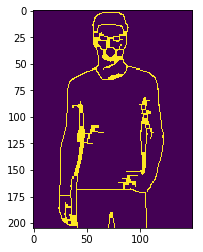

In [6]:
#Detecting the edges
edged = cv2.Canny(gray,50,100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
#finding the contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
plt.imshow(edged)

In [7]:
# determine average length of contours
avg = 0
for c in cnts:
    avg += len(c)
    
avg /= len(cnts)

# save index of largest contour
largestIdx = -1
largestSize = -1

In [8]:
# find size of the reference square
for i, c in enumerate(cnts):
    # keep track of largest one
    if len(c) > largestSize:
        largestSize = len(c)
        largestIdx = i 
    if len(c) > avg / 10:
        # get approximating
        epsilon = 0.1 * cv2.arcLength(curve = c, closed = True)
        approx = cv2.approxPolyDP(curve = c, epsilon = epsilon, closed = True)
    # the one with four vertices should be the reference
    if len(approx) == 4:
        # save bounding rectangle info
        x, y, w, h = cv2.boundingRect(c)

In [9]:
# calculate cm per pixels scale
scaleX = 2.54 / w
scaleY = 2.54 / h
    

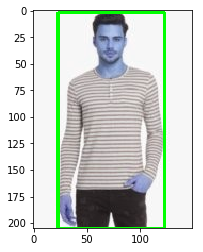

In [10]:
# get bounding box for the largest contour
x, y, w, h = cv2.boundingRect(cnts[largestIdx])
img1 = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img1)

In [11]:
# calculate height and width of the leaf
height = h * scaleY
width = w * scaleX

# print results
print('%0.2f cm wide x %0.2f cm tall' % (width, height))
area= width*height
print('Area=%0.2f'%(area))

36.29 cm wide x 34.37 cm tall
Area=1247.31


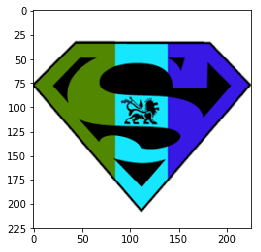

In [31]:
Image= cv2.imread('img.png')

#converting image to HSV
hsv=cv2.cvtColor(Image,cv2.COLOR_BGR2HSV)
plt.imshow(Image)


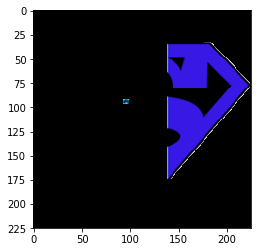

In [30]:
#defining the range of red color
red_lower=np.array([136,87,111],np.uint8)
red_upper=np.array([180,255,255],np.uint8)

#finding the range of red color in the image
red=cv2.inRange(hsv, red_lower, red_upper)

#Morphological transformation, Dilation  
kernal = np.ones((5 ,5), "uint8")
red=cv2.dilate(red, kernal)
res=cv2.bitwise_and(Image, Image, mask = red)

plt.imshow(res)
